In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spotify_data_path = "Spotify Most Streamed Songs.csv"
spotify_data = pd.read_csv(spotify_data_path)

In [5]:
spotify_info = spotify_data.info()
spotify_head = spotify_data.head()

spotify_info
print(spotify_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [3]:
# Convert 'streams' column to numeric
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Drop unnecessary columns
spotify_data_cleaned = spotify_data.drop(columns=['cover_url'])

# Handle missing values (example: dropping rows with missing 'streams')
spotify_data_cleaned = spotify_data_cleaned.dropna(subset=['streams'])

# Rename 'artist(s)_name' to 'artist_name' in the Spotify dataset
spotify_data_cleaned.rename(columns={'artist(s)_name': 'artist_name'}, inplace=True)

NameError: name 'spotify_data' is not defined

In [10]:
import billboard
import pandas as pd
from datetime import datetime, timedelta
import time

def fetch_billboard_monthly(start_date, end_date, chart_name='hot-100', delay=0.5):
    """
    Fetch Billboard chart data for the first week of each month in the given date range.
    
    Args:
    - start_date (datetime): Start date for fetching data.
    - end_date (datetime): End date for fetching data.
    - chart_name (str): Name of the Billboard chart to fetch (default: 'hot-100').
    - delay (int): Delay in seconds between requests to avoid rate limiting.

    Returns:
    - pd.DataFrame: A DataFrame containing the fetched data.
    """
    current_date = start_date
    all_data = []

    while current_date <= end_date:
        try:
            # Fetch the chart for the current month
            chart = billboard.ChartData(chart_name, date=current_date.strftime('%Y-%m-%d'))
            for song in chart:
                all_data.append({
                    'date': current_date.strftime('%Y-%m-%d'),
                    'track_name': song.title,
                    'artist_name': song.artist,
                    'peak_position': song.peakPos,
                    'weeks_on_chart': song.weeks,
                    'current_position': song.rank
                })
            print(f"Fetched chart for {current_date}")
        except Exception as e:
            print(f"Failed to fetch data for {current_date}: {e}")
        
        # Move to the first day of the next month
        next_month = current_date.month + 1 if current_date.month < 12 else 1
        next_year = current_date.year if current_date.month < 12 else current_date.year + 1
        current_date = datetime(next_year, next_month, 1)

        # Add a delay to avoid rate limiting
        time.sleep(delay)

    # Convert collected data to a DataFrame
    return pd.DataFrame(all_data)

# Define the date range (2000–Current)
start_date = datetime(2000, 1, 1)
end_date = datetime.now()

# Fetch data for the defined range
print("Fetching Billboard data...")
billboard_data = fetch_billboard_monthly(start_date, end_date)

# Save to a CSV file
output_file = "billboard_hot_100_2000_to_current_monthly.csv"
billboard_data.to_csv(output_file, index=False)

# Display a success message
print(f"Data successfully fetched and saved to '{output_file}'!")


Fetching Billboard data...
Fetched chart for 2000-01-01 00:00:00
Fetched chart for 2000-02-01 00:00:00
Fetched chart for 2000-03-01 00:00:00
Fetched chart for 2000-04-01 00:00:00
Fetched chart for 2000-05-01 00:00:00
Fetched chart for 2000-06-01 00:00:00
Fetched chart for 2000-07-01 00:00:00
Fetched chart for 2000-08-01 00:00:00
Fetched chart for 2000-09-01 00:00:00
Fetched chart for 2000-10-01 00:00:00
Fetched chart for 2000-11-01 00:00:00
Fetched chart for 2000-12-01 00:00:00
Fetched chart for 2001-01-01 00:00:00
Fetched chart for 2001-02-01 00:00:00
Fetched chart for 2001-03-01 00:00:00
Fetched chart for 2001-04-01 00:00:00
Fetched chart for 2001-05-01 00:00:00
Fetched chart for 2001-06-01 00:00:00
Fetched chart for 2001-07-01 00:00:00
Fetched chart for 2001-08-01 00:00:00
Fetched chart for 2001-09-01 00:00:00
Fetched chart for 2001-10-01 00:00:00
Fetched chart for 2001-11-01 00:00:00
Fetched chart for 2001-12-01 00:00:00
Fetched chart for 2002-01-01 00:00:00
Fetched chart for 2002-

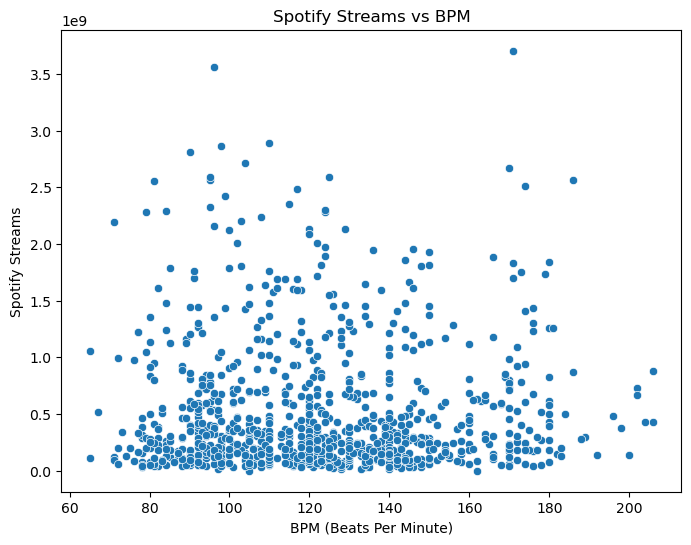

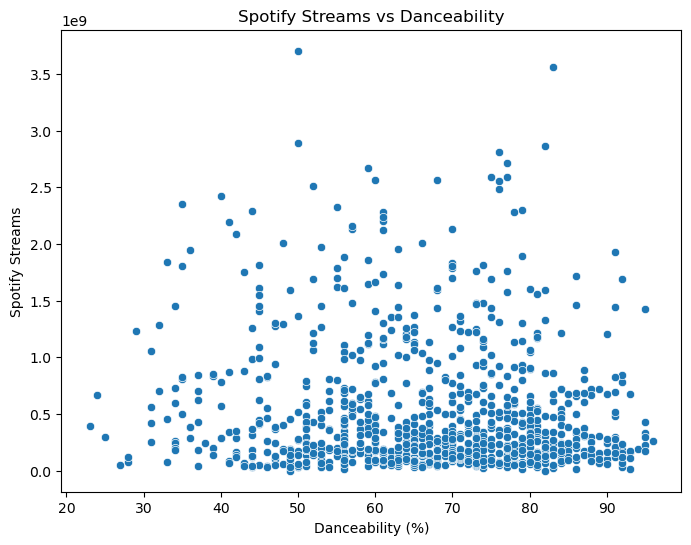

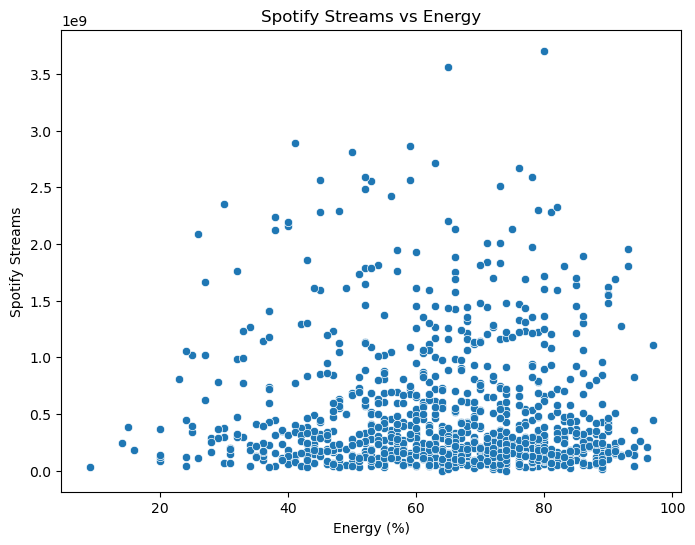

In [49]:
# Question 1: Which attributes drive Spotify streaming success?

# Analyze correlation between bpm and streams
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_data_cleaned['bpm'], y=spotify_data_cleaned['streams'])
plt.title('Spotify Streams vs BPM')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Spotify Streams')
plt.show()
# Analyze danceability vs streams
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_data_cleaned['danceability_%'], y=spotify_data_cleaned['streams'])
plt.title('Spotify Streams vs Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Spotify Streams')
plt.show()
# Analyze energy vs streams
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_data_cleaned['energy_%'], y=spotify_data_cleaned['streams'])
plt.title('Spotify Streams vs Energy')
plt.xlabel('Energy (%)')
plt.ylabel('Spotify Streams')
plt.show()


In [51]:
from fuzzywuzzy import process

# Function for fuzzy matching with a cutoff
def find_best_match(song, spotify_titles):
    match = process.extractOne(song, spotify_titles, score_cutoff=85)  # Set cutoff
    return match[0] if match else None

# Apply fuzzy matching to the Billboard track names
spotify_titles = spotify_data_cleaned['track_name'].tolist()
top_billboard['matched_track'] = top_billboard['track_name'].apply(
    lambda x: find_best_match(x, spotify_titles)
)

# Filter out unmatched entries
matched_billboard_songs = top_billboard.dropna(subset=['matched_track'])


,track_name,artist_name,streams,bpm,key


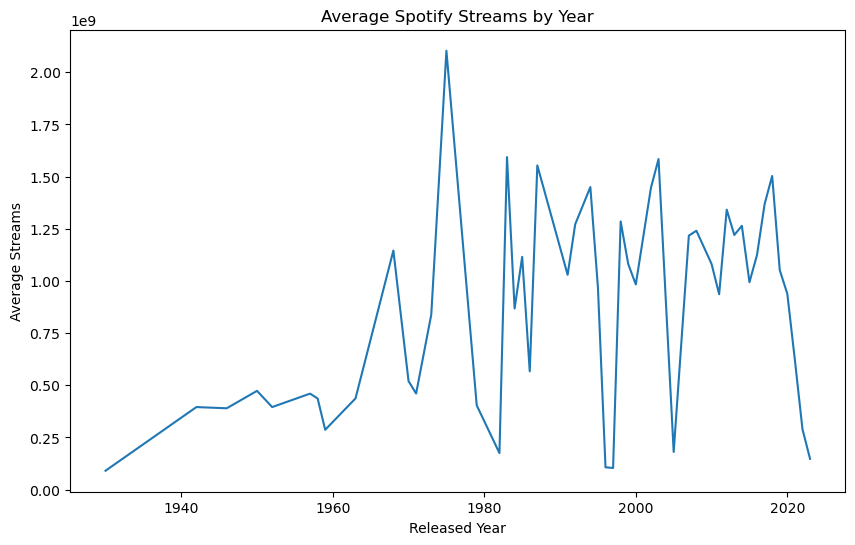

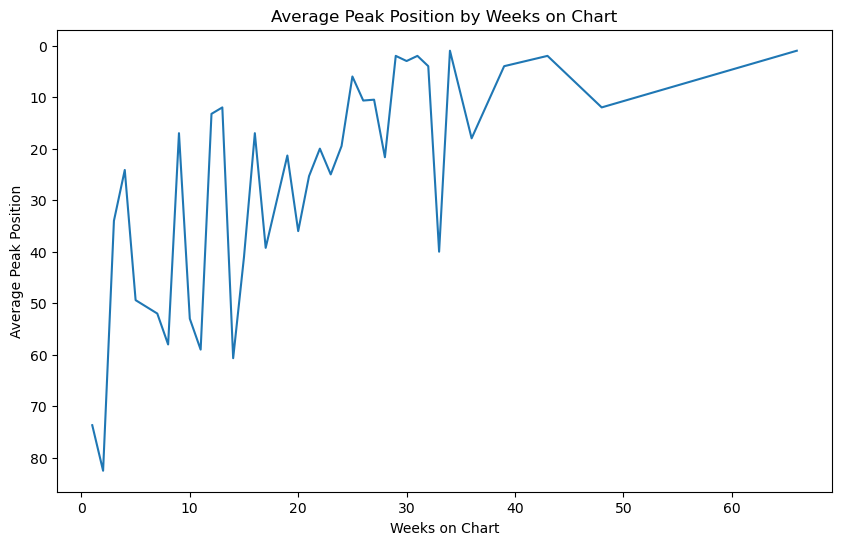

In [55]:
# Question 3: What are the yearly trends in streaming and chart performance?

# Group Spotify streams by release year
spotify_streams_by_year = spotify_data_cleaned.groupby('released_year')['streams'].mean()

# Plot yearly trends for Spotify streams
plt.figure(figsize=(10, 6))
spotify_streams_by_year.plot(kind='line', title='Average Spotify Streams by Year')
plt.xlabel('Released Year')
plt.ylabel('Average Streams')
plt.show()

# Analyze Billboard weeks on chart trends
billboard_trends = billboard_data.groupby('weeks_on_chart')['peak_position'].mean()

# Plot average peak position by weeks on chart
plt.figure(figsize=(10, 6))
billboard_trends.plot(kind='line', title='Average Peak Position by Weeks on Chart')
plt.xlabel('Weeks on Chart')
plt.ylabel('Average Peak Position')
plt.gca().invert_yaxis()  # Higher positions are better
plt.show()